# Classification Modeling

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Load Data

In [2]:
df = pd.read_csv('data/train.csv')

X = df.drop('label', axis=1)
y = df.label

df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Preprocessing
Create greyscale and binary image representations and split into training and testing sets


In [3]:
# Create a dataset with grayscale image data and another with binary (black and white) image data

X_greyscale = X
y_greyscale = y

convert_binary = lambda x: 1 if x > 0 else 0
X_binary = X.applymap(convert_binary)
y_binary = y.apply(convert_binary)

X_gs_train, X_gs_test, y_gs_train, y_gs_test = train_test_split(X_greyscale, y_greyscale, test_size=.25, random_state=1)
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=.25, random_state=1)

In [4]:
X_greyscale.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


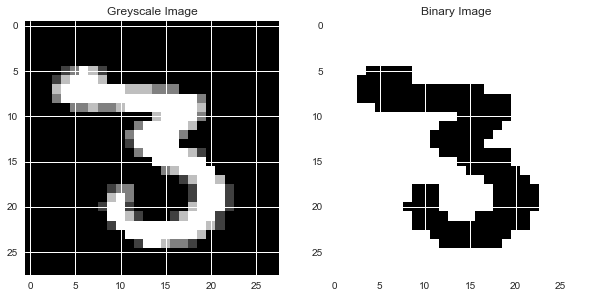

In [5]:
# Plot visualiztion of the different representations

plt.figure(figsize=(10, 6))

plt.figure(1)

plt.subplot(121)
image_greyscale = X_greyscale.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_greyscale, cmap='gray')
plt.title('Greyscale Image')

plt.subplot(122)
image_binary = X_binary.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_binary, cmap='binary')
plt.title('Binary Image')

## Baseline Models
Train and validate baseline models suing subset of training data 

In [6]:
# Use some basic models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

# Use some ensemble methods, for this useit's okay if our model is a black box

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

baseline_models = [SVC, GaussianNB, QuadraticDiscriminantAnalysis, DecisionTreeClassifier, 
                   RandomForestClassifier, AdaBoostClassifier]
baseline_models_str = ['SVC', 'GaussianNB', 'QDA', 'Decision Tree', 
                   'Random Forest', 'Ada Boost']
baseline_scores_greyscale = []
baseline_scores_binary = []

for m in baseline_models:
    baseline_scores_greyscale.append(np.mean(cross_val_score(m(), X_gs_train[:5000], y_gs_train[:5000])))
    
for m in baseline_models:
    baseline_scores_binary.append(np.mean(cross_val_score(m(), X_binary_train[:5000], y_binary_train[:5000])))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [7]:
baseline_df = pd.DataFrame()
baseline_df['model'] = pd.Series(baseline_models_str*2)
baseline_df['score'] = pd.Series(baseline_scores_greyscale + baseline_scores_binary)
baseline_df['kind'] = pd.Series(['Greyscale']*len(baseline_models) + ['Binary']*len(baseline_models))

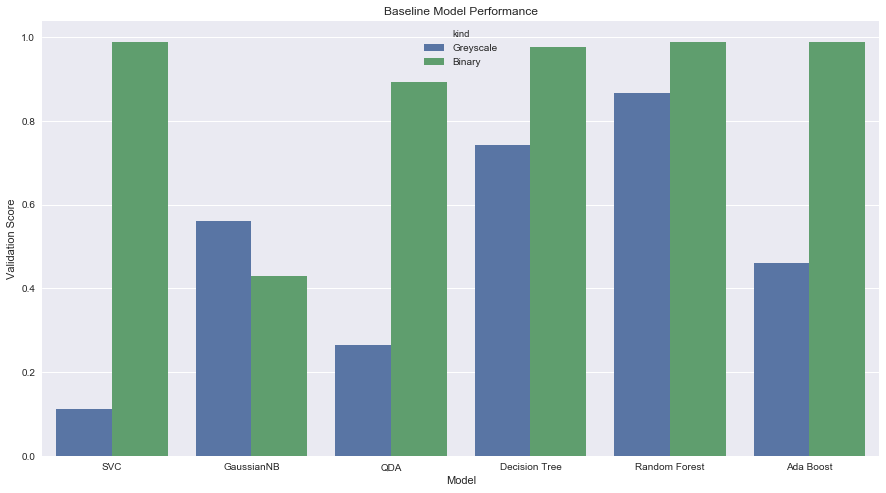

In [8]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(x='model', y='score', hue='kind', data = baseline_df)
ax.set(title='Baseline Model Performance', xlabel='Model', ylabel="Validation Score")

In [9]:
models = baseline_df.model.tolist()
scores = baseline_df.score.tolist()
kinds = baseline_df.kind.tolist()
for model, kind, score in zip(models, kinds, scores):
    print(model, '(', kind, '):', score)

SVC ( Greyscale ): 0.11179991856772296
GaussianNB ( Greyscale ): 0.5606045297919721
QDA ( Greyscale ): 0.26559427851067796
Decision Tree ( Greyscale ): 0.7430144969452249
Random Forest ( Greyscale ): 0.8667896355558424
Ada Boost ( Greyscale ): 0.46067147401425085
SVC ( Binary ): 0.9879990365450736
GaussianNB ( Binary ): 0.42881373172770304
QDA ( Binary ): 0.8927988461571679
Decision Tree ( Binary ): 0.9754004719393753
Random Forest ( Binary ): 0.9891980773124597
Ada Boost ( Binary ): 0.9872001558417131


Validation scores are generally much higher when using the binary representation of the images as opposed to the greyscale representation. The only model that scores lower is the Naive Bayes model, which makes sense since it's the only generative one in this set and greyscale values allow it to better emulate the natural distribution of a given digit.

## Model Tuning
Tune hyperparameters of best models (SVC and Random Forest) using simple cross-validation and then a full grid search

### SVM

In [10]:
# Build linear SVC
svc_linear = SVC(kernel='linear')

# Perform cross-validation to find optimal C value
scores_linear = []
params_linear = np.logspace(-6, 6, 20)
for i in params_linear:
    svc_linear.C = i
    scores = cross_val_score(svc_linear, X_binary_train[:3000], y_binary_train[:3000], cv=5)
    scores_linear.append(1 - np.mean(scores))

index_linear = scores_linear.index(min(scores_linear))
C_linear = params_linear[index_linear]

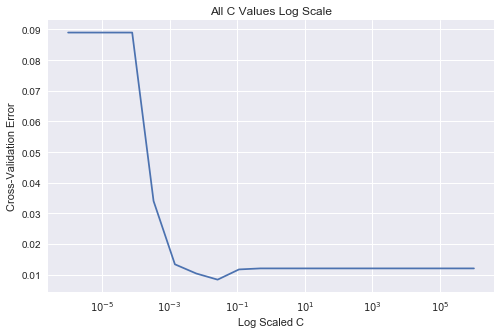

Optimal C:  0.0263665089873


In [11]:
# Plot cross-validation error

plt.figure(figsize=(8, 5))

plt.plot(params_linear, scores_linear)
plt.xlabel('Log Scaled C')
plt.ylabel('Cross-Validation Error')
plt.title('All C Values Log Scale')
plt.xscale('log')
plt.show()
print('Optimal C: ', C_linear)

In [12]:
svc_tuned = SVC(kernel='linear', C=C_linear)
svc_tuned.fit(X_binary_train, y_binary_train)
svc_predict = svc_tuned.predict(X_binary_test)
svc_accuracy = accuracy_score(y_binary_test, svc_predict)
print('Tuned SVM Accuracy: ', svc_accuracy)

Tuned SVM Accuracy:  0.992


99.2% is a decent improvement from our untuned SVM model, but it still doesn't surpass the performance of other simple models. Let's do a full grid search cross-validation, checking different kernels, to see if we can get an even higher score.

In [21]:
parameter_candidates = [
  {'C': [.001, .01, 1, 10, 100], 'kernel': ['linear']},
  {'C': [.001, .01, 1, 10, 100], 'gamma': [.01, .001, 0.0001], 'kernel': ['rbf']},
  {'C': [.001, .01, 1, 10, 100], 'degree': [1, 2, 3, 4], 'kernel': ['poly']}
]

clf_svm = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

clf_svm.fit(X_binary_train[:5000], y_binary_train[:5000]);   

In [22]:
print('SVM accuracy with GridSearchCV: ',clf_svm.best_score_)
clf_svm.best_estimator_

SVM accuracy with GridSearchCV:  0.996


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The grid search found that a Gaussian SVM best fits the data and produced a tuned model with a validation score of 99.6%. Fantastic result for a simple tuned model.

### Random Forest

In [15]:
# Build new random forest classifier
rf = RandomForestClassifier()

# Perfrom cross-validation to find optimal maximum depth parameter
scores_max_depth = []
params_max_depth = np.logspace(1, 8, 20)
for x in params_max_depth:
    rf.max_depth = x
    scores = cross_val_score(rf, X_binary_train[:10000], y_binary_train[:10000], cv=10)
    scores_max_depth.append(1 - np.mean(scores))

index_max_depth = scores_max_depth.index(min(scores_max_depth))
optimal_max_depth = params_max_depth[index_max_depth]

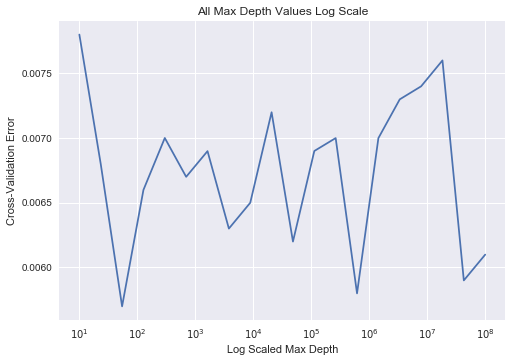

Optimal Max Depth:  54.5559478117


In [16]:
plt.plot(params_max_depth, scores_max_depth)
plt.xlabel('Log Scaled Max Depth')
plt.ylabel('Cross-Validation Error')
plt.title('All Max Depth Values Log Scale')
plt.xscale('log')
plt.show()
print('Optimal Max Depth: ', optimal_max_depth)

In [17]:
rf_tuned = RandomForestClassifier()
rf_tuned.fit(X_binary_train, y_binary_train)
rf_predict = rf_tuned.predict(X_binary_test)
rf_accuracy = accuracy_score(y_binary_test, svc_predict)
print('Tuned Random Forest Accuracy: ', rf_accuracy)

Tuned Random Forest Accuracy:  0.992


In [20]:
parameter_candidates = [
  {'n_estimators': [10, 100, 500, 1000, 5000, 10000], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 3, 4],
  'criterion': ['gini', 'entropy']},
]

clf_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_candidates, n_jobs=-1)

clf_rf.fit(X_binary_train[:5000], y_binary_train[:5000]);   

In [19]:
print('Random Forest score with GridSearchCV: ',clf_rf.best_score_)
clf_rf.best_estimator_

Random Forest score with GridSearchCV:  0.9926


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

We're only getting a slight boost in performance when we try to tune our random forest classifier, and there's no significant difference between only tuning one hyperparameter and tuning four. This makes sense since it's an ensemble method and acts more like a "black box" that we can't interact with too easily. 

After tuning a Gaussian SVM has show to have the best validation performace. Let's test its accuracy by training it on our full training set and testing it against our full testing set.

In [23]:
svm = clf_svm.best_estimator_
svm.fit(X_binary_train, y_binary_train)
prediction_svm = svm.predict(X_binary_test)
accuracy_svm = accuracy_score(y_binary_test, prediction_svm)
print(accuracy_svm)

0.997714285714


Our tuned Support Vector Classifier has an accuracy of 99.77%. This is awesome for a relativley simple discriminative model. But I think we can do better here. I'm going to try using deep learning achieve a higher level of accuracy.

## Deep Learning